# Naive Bayes

A naive Bayes classifier is a special case of a Bayesian classifier based on the additional assumption that x\in X objects are described by n statistically independent features.

## Plan of the work

### 1. Data analysis
- Importing Libraries
- Data description
- Shape of data
- Checking Data-Types of columns

### 2. Data  visualisation
- Displaying of data columns
 - diplaying drugs
 - displaying sex
 - displaying age
 - displaying blood pressure
 - displaying NaToK
 - age representing
 - NaToK representing
 - Gender distribution based on drug type
 
### 3. Dataset preparation
 
- Data splitting
- Feature ingeneering
- Applying SMOTE Technique

### 4. Naive Bayes

- Categorical Naive Bayes
- Gaussian Naive Bayes

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

### Data description

```
This dataset contains information about drug classification based on patient general information and its diagnosis.

The following is the structure of the data set.

Variable Name  Description                         Sample Data
Age            Patient Age                         23; 47; ...
Sex            Gender of patient (male or female)  F; M; ...
BP             Levels of blood pressure
               (high, normal, or low)              HIGH; NORMAL; LOW; ...
Cholesterol    Levels of cholesterol
               (high or normal)                    1.4; 1.3; ...
Na_to_K        Sodium to potassium ratio in blood  25.355; 13.093; ...
Drug           Type of drug                        DrugY; drugC; ...
```

In [2]:
df = pd.read_csv('./drug200.csv')
df.head(5)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


### Checking Data-Types of columns

#### & check on missing or null values

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [4]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [5]:
# Function for displaying feature bar

def display_feature(name, data):
    color=['#003f5c','#ffa600','#58508d','#bc5090','#ff6361']
    chosen_feature = data[name].value_counts()
    print(chosen_feature)
    plt.figure(figsize=(9,3))
    labels = data[name].unique()
    values = []
    for feature_el_number in range(len(chosen_feature)):
        print(feature_el_number)
        values.append(chosen_feature[feature_el_number])
    plt.bar(labels, values, color=color[0:len(chosen_feature)])

 ## 2. Data visualisation

In [6]:
df.Drug.value_counts()

drugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

### Display drugs

drugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64
0
1
2
3
4


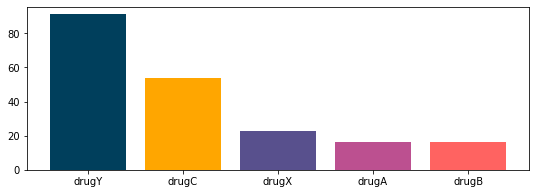

In [7]:
display_feature(name='Drug', data=df)

### Display sex

M    104
F     96
Name: Sex, dtype: int64
0
1


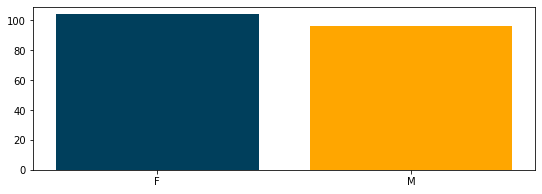

In [8]:
display_feature(name='Sex', data=df)

### Display Blood pressure

HIGH      77
LOW       64
NORMAL    59
Name: BP, dtype: int64
0
1
2


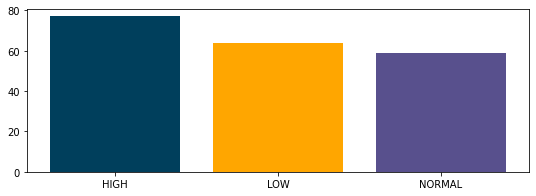

In [9]:
display_feature(name='BP', data=df)

### Describe age

The distribution of 'Age' column is symetric, since the skewness value between -0.5 and 0.5

/home/mono/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


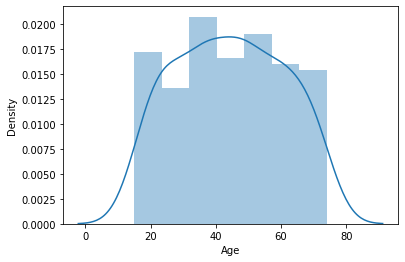

In [10]:
sns.distplot(df['Age']);

### Describe Na to K

The distribution of 'Na_to_K' column is moderately skewed, since the skewness value is between 0.5 and 1. 
It can also be seen from the histogram for 'Na_to_K' column


/home/mono/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


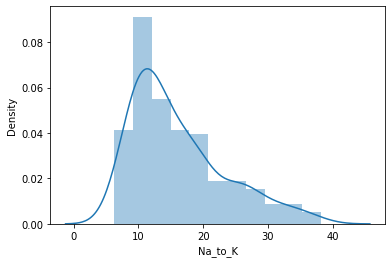

In [11]:
sns.distplot(df['Na_to_K']);

### Gender distribution based on drug type

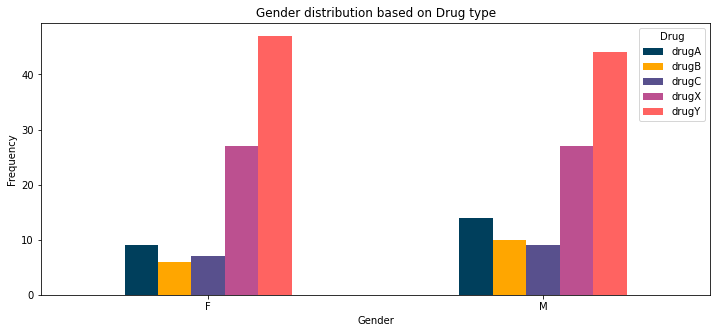

In [12]:
pd.crosstab(df.Sex,df.Drug).plot(kind="bar", 
                                 figsize=(12,5),
                                 color=['#003f5c','#ffa600','#58508d','#bc5090','#ff6361'])
plt.title('Gender distribution based on Drug type')
plt.xlabel('Gender')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

## 3. Dataset Preparation

### The age will be divided into 7 age categories:

In [13]:
bin_age = [0, 19, 29, 39, 49, 59, 69, 80]
category_age = ['<20s', '20s', '30s', '40s', '50s', '60s', '>60s']
df['Age_binned'] = pd.cut(df['Age'], bins=bin_age, labels=category_age)
df = df.drop(['Age'], axis = 1)

### The chemical ratio will be divided into 4 categories:

In [14]:
bin_NatoK = [0, 9, 19, 29, 50]
category_NatoK = ['<10', '10-20', '20-30', '>30']
df['Na_to_K_binned'] = pd.cut(df['Na_to_K'], bins=bin_NatoK, labels=category_NatoK)
df = df.drop(['Na_to_K'], axis = 1)

In [15]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [16]:
X = df.drop(["Drug"], axis=1)
y = df["Drug"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

### Feature engeneering

In [17]:
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)
X_train.head()

,Sex_F,Sex_M,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL,Age_binned_<20s,Age_binned_20s,Age_binned_30s,Age_binned_40s,Age_binned_50s,Age_binned_60s,Age_binned_>60s,Na_to_K_binned_<10,Na_to_K_binned_10-20,Na_to_K_binned_20-30,Na_to_K_binned_>30
131,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1
96,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1
181,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0
19,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0
153,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0


In [18]:
X_test.head()

,Sex_F,Sex_M,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL,Age_binned_<20s,Age_binned_20s,Age_binned_30s,Age_binned_40s,Age_binned_50s,Age_binned_60s,Age_binned_>60s,Na_to_K_binned_<10,Na_to_K_binned_10-20,Na_to_K_binned_20-30,Na_to_K_binned_>30
18,0,1,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0
170,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0
107,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0
98,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1
177,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0


### Applying SMOTE Technique

Since the number of 'DrugY' is more than other types of drugs, oversampling is carried out to avoid overfitting.

In [19]:
from imblearn.over_sampling import SMOTE
X_train, y_train = SMOTE().fit_resample(X_train, y_train)

Now we can see that distribution of drug is balanced

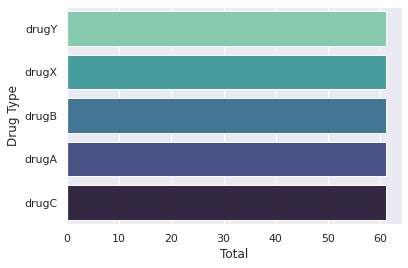

In [20]:
sns.set_theme(style="darkgrid")
sns.countplot(y=y_train, data=df, palette="mako_r")
plt.ylabel('Drug Type')
plt.xlabel('Total')
plt.show()

## Naive Bayes

### Categorical Naive Bayes

The categorical Naive Bayes classifier is suitable for classification with discrete features that are categorically distributed. The categories of each feature are drawn from a categorical distribution.
[docs](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.CategoricalNB.html)

In [21]:
from sklearn.naive_bayes import CategoricalNB
NBclassifier1 = CategoricalNB()
NBclassifier1.fit(X_train, y_train)

y_pred = NBclassifier1.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
NBAcc1 = accuracy_score(y_pred,y_test)
print('\nNaive Bayes accuracy is: {:.2f}%'.format(NBAcc1*100))

              precision    recall  f1-score   support

       drugA       0.62      1.00      0.77         5
       drugB       0.75      1.00      0.86         3
       drugC       0.50      0.50      0.50         4
       drugX       0.73      0.89      0.80        18
       drugY       0.91      0.67      0.77        30

    accuracy                           0.77        60
   macro avg       0.70      0.81      0.74        60
weighted avg       0.80      0.77      0.76        60

[[ 5  0  0  0  0]
 [ 0  3  0  0  0]
 [ 0  0  2  2  0]
 [ 0  0  0 16  2]
 [ 3  1  2  4 20]]

Naive Bayes accuracy is: 76.67%


### Gaussiam Naive Bayes

Gaussian Naive Bayes is a variant of Naive Bayes that follows Gaussian normal distribution and supports continuous data. We have explored the idea behind Gaussian Naive Bayes along with an example.

In [22]:
from sklearn.naive_bayes import GaussianNB
NBclassifier2 = GaussianNB()
NBclassifier2.fit(X_train, y_train)

y_pred = NBclassifier2.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
NBAcc2 = accuracy_score(y_pred, y_test)
print('\nGaussian Naive Bayes accuracy is: {:.2f}%'.format(NBAcc2*100))

              precision    recall  f1-score   support

       drugA       1.00      0.20      0.33         5
       drugB       0.75      1.00      0.86         3
       drugC       0.67      1.00      0.80         4
       drugX       1.00      0.39      0.56        18
       drugY       0.64      0.90      0.75        30

    accuracy                           0.70        60
   macro avg       0.81      0.70      0.66        60
weighted avg       0.79      0.70      0.67        60

[[ 1  0  0  0  4]
 [ 0  3  0  0  0]
 [ 0  0  4  0  0]
 [ 0  0  0  7 11]
 [ 0  1  2  0 27]]

Gaussian Naive Bayes accuracy is: 70.00%


### Used metrics

[About metrics](https://towardsdatascience.com/20-popular-machine-learning-metrics-part-1-classification-regression-evaluation-metrics-1ca3e282a2ce)

#### Accuracy

Number of correct predictions / Total number of predictions

#### Precision

There are many cases in which classification accuracy is not a good indicator of your model performance. One of these scenarios is when your class distribution is imbalanced (one class is more frequent than others). In this case, even if you predict all samples as the most frequent class you would get a high accuracy rate, which does not make sense at all (because your model is not learning anything, and is just predicting everything as the top class).

Precision= True_Positive/ (True_Positive+ False_Positive)

#### Recall
Recall is another important metric, which is defined as the fraction of samples from a class which are correctly predicted by the model. More formally:

Recall= True_Positive/ (True_Positive+ False_Negative)

#### F1 Score
Depending on application, you may want to give higher priority to recall or precision. But there are many applications in which both recall and precision are important. Therefore, it is natural to think of a way to combine these two into a single metric. One popular metric which combines precision and recall is called F1-score, which is the harmonic mean of precision and recall defined as:

F1-score= 2*Precision*Recall/(Precision+Recall)

#### Confusion matrix : 
A confusion matrix (aka an error matrix) is a specific table layout that allows visualization of the performance of a supervised learning algorithm. Each row of the matrix represents the instances in an actual class while each column represents the instances in a predicted class [wiki]. The table below is an example of a confusion matrix for a binary classification from which other terminologies/metric can be derived. Some of the metrics are described below.

true positive (TP)
A test result that correctly indicates the presence of a condition or characteristic
true negative (TN)
A test result that correctly indicates the absence of a condition or characteristic
false positive (FP)
A test result which wrongly indicates that a particular condition or attribute is present
false negative (FN)
A test result which wrongly indicates that a particular condition or attribute is absent
